# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Nguyễn Quốc Thắng
- MSSV: 22127385
- Lớp: 22CLC01

## Import các thư viện liên quan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Helper functions

In [2]:
def read_img(img_path):
    im = mpimg.imread(img_path) # use matplotlib
    im_2D = np.array(im) # (height, witdh, channels)
    return im_2D

def show_img(img_2d):
    plt.imshow(img_2d) 
    plt.axis('off') #hide axis
    plt.show()

def save_as_img(img_2d, img_path):
    mpimg.imsave(img_path, img_2d)

def save_as_pdf(img_2d, img_path):
    plt.imshow(img_2d)
    plt.axis('off') 
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
   
def convert_img_to_1d(img_2d):
    img_2d = np.array(img_2d)
    height, width, channels = img_2d.shape
    img_1d = np.reshape(img_2d, (height * width, channels)) 
    return img_1d
   
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    #step1: initialize the centers
    def kmeans_init_centers(X, k):
        if init_centroids == 'random':
            # Generate random centroids within the range of X's color space
            centers = np.random.randint(0, 255, (k, X.shape[1]))
        elif init_centroids == 'in_pixels':
            # Select k random pixels from X to server as the initial centroids
            centers = X[np.random.choice(range(X.shape[0]), k, replace=False)]
        return centers

    #step2: assign the labels
    def kmeans_assign_labels(X, centers):
        return np.argmin(np.linalg.norm(X[:, None] - centers, axis=-1), axis=-1)

    #step3: update the centers
    def kmeans_update_centers(X, labels, k):
        centers = np.zeros((k, X.shape[1]))
        for i in range(k):
            # Find all points that belong to cluster i
            cluster_points = X[labels == i]
            if cluster_points.shape[0] > 0 and cluster_points.shape[0] >= X.shape[1]:
                centers[i] = np.mean(cluster_points, axis=0)
            else:
                # If a cluster has no points, randomly initialize a new centroid
                if cluster_points.shape[0] > 0 and cluster_points.shape[0] >= X.shape[1]:
                    centers[i] = np.mean(cluster_points, axis=0)
        return centers
    
    #step4: check the convergence
    def kmeans_has_converged(centers, new_centrers):
        # return True if two sets of centers are the same
        return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centrers]))
    
    #main
    centers = kmeans_init_centers(img_1d, k_clusters)
    labels = np.zeros(img_1d.shape[0])
    iters = 0
    while iters < max_iter:
        new_centers = centers
        labels = kmeans_assign_labels(img_1d, centers)
        centers = kmeans_update_centers(img_1d, labels, k_clusters)
        if kmeans_has_converged(new_centers, centers):
            break
        iters += 1
    return centers, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    # Initialize an empty image array
    img = np.zeros(img_2d_shape, dtype=np.uint8)

    # Reshape labels to match image dimensions (for easier mapping)
    labels_reshaped = labels.reshape(img_2d_shape[0], img_2d_shape[1])

    # Assign centroid colors to each pixel based on its label
    for i in range(img_2d_shape[0]):  
        for j in range(img_2d_shape[1]): 
            # Find the centroid color for the current pixel
            centroid_color = centroids[labels_reshaped[i, j]]
            # Assign the centroid color to the current pixel
            img[i, j] = centroid_color
    return img

## Your tests

## Main FUNCTION

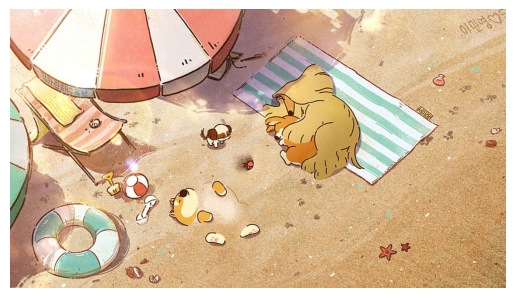

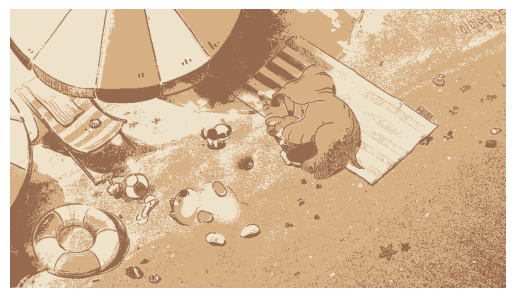

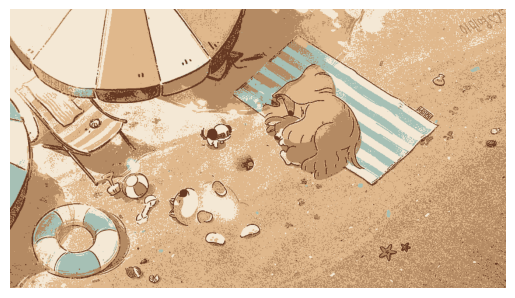

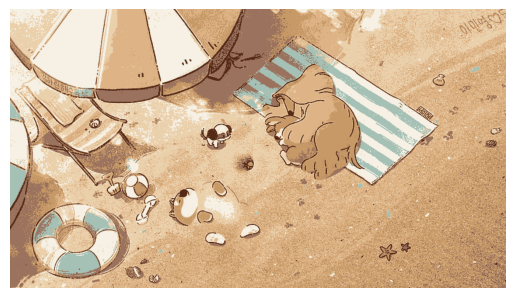

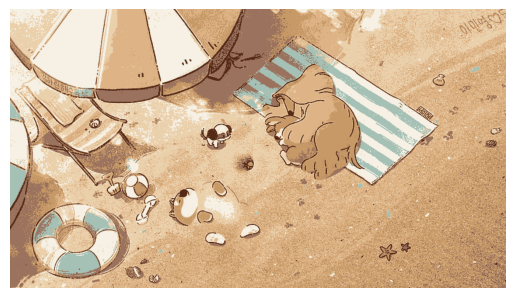

In [3]:
# YOUR CODE HERE
if __name__ == '__main__':
    # Read image
    img_path = 'input3.jpg' # Input image path here
    img = read_img(img_path)
    show_img(img)
    # Convert image to 1D
    img_1d = convert_img_to_1d(img)
    # K-means
    k_clusters = [3,5,7]
    max_iter = 100
    for k in k_clusters:
        centroids, labels = kmeans(img_1d, k, max_iter, init_centroids='random')
        new_img = generate_2d_img(img.shape, centroids, labels)
        show_img(new_img)
        input = 'pdf' # 'jpg' or 'pdf'
        if input == 'jpg':
            save_as_img(new_img, f'output_{k}.jpg')
        elif input == 'pdf':
            save_as_pdf(new_img, f'output_{k}.pdf')